In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)
df.drop(columns=['Cabin'], inplace =True)

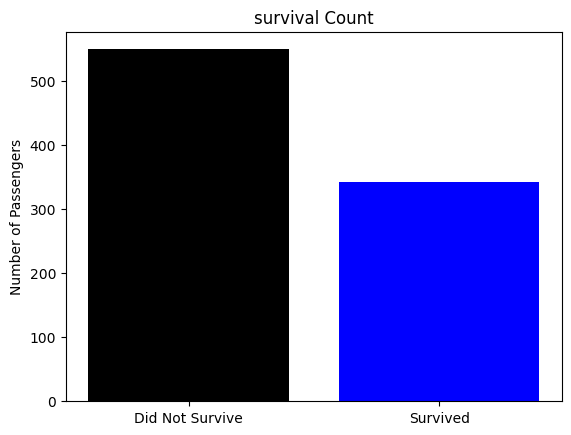

In [33]:
#plot survival count
survived_count =df['Survived'].value_counts()
import matplotlib.pyplot as plt
plt.bar(survived_count.index, survived_count.values, color=['black','blue'])
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.title('survival Count')
plt.ylabel('Number of Passengers')
plt.show()

Text(0, 0.5, 'Count')

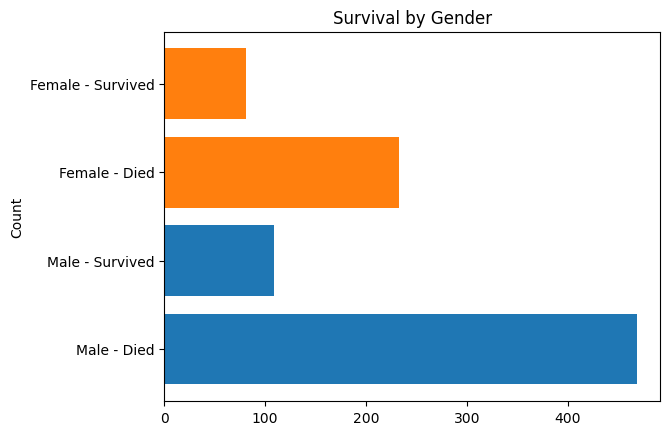

In [41]:
#Gender vs Survival
male_survived=df[df['Sex']=='male']['Survived'].value_counts()
female_survived=df[df['Sex']=='female']['Survived'].value_counts()

plt.barh(['Male - Died', 'Male - Survived'], male_survived)
plt.barh(['Female - Died', 'Female - Survived'], female_survived)
plt.title('Survival by Gender')
plt.ylabel('Count')

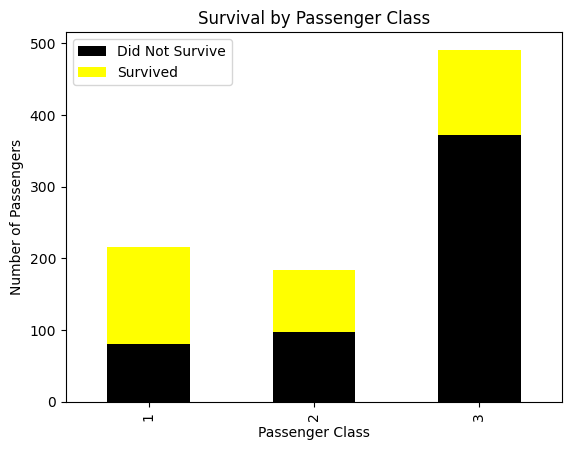

In [45]:
#Pclass VS Survivasl
Pclass_survival=pd.crosstab(df['Pclass'],df['Survived'])
Pclass_survival.plot(kind='bar',stacked=True,color=['black','yellow'])
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive', 'Survived'])


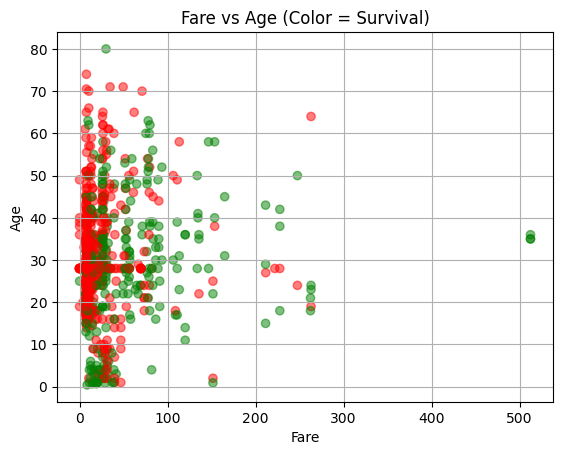

In [46]:
# Fare vs Survival
colors = df['Survived'].map({0: 'red', 1: 'green'})

plt.scatter(df['Fare'], df['Age'], alpha=0.5, c=colors)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare vs Age (Color = Survival)')
plt.grid(True)
#Insight: Most survivors paid higher fare and were younger.